# Data Normalization

Author : Arash Ghazi

Contact : arash.ghazi.2012@gmail.com


![Normalization](Normalization-1.jpg)

Data normalization is a crucial step in data preprocessing in order to standardize and scale data values across various ranges. This helps improve the performance and accuracy of machine learning models. Here are several different methods of normalization, each suited for different scenarios:

## 1. Min-Max Normalization
**Min-Max Normalization** is a data normalization technique used to scale data values to a specific range, typically between 0 and 1. This method adjusts the data so that the minimum value of the dataset becomes 0 and the maximum value becomes 1, with other values linearly adjusted in between. This approach is often useful when you want to bring all features to a common scale without distorting differences in the ranges of values.

### Formula:
Min-Max Normalization follows this formula:

\[
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\]

Where:
- \( X \) is the original value of the data.
- \( X' \) is the normalized value.
- \( X_{\text{min}} \) is the minimum value in the dataset.
- \( X_{\text{max}} \) is the maximum value in the dataset.

### Steps:
1. **Find the minimum and maximum values** in the dataset.
2. **Subtract the minimum value** from each data point.
3. **Divide the result** by the range (i.e., the difference between the maximum and minimum values).
4. The result is a normalized value between 0 and 1.

### Example:
Consider the following data: [200, 300, 400, 500, 600].

1. **Find the minimum** \( X_{\text{min}} = 200 \) and **maximum** \( X_{\text{max}} = 600 \).
2. Apply the Min-Max Normalization formula for each value:
   - \( X' = \frac{200 - 200}{600 - 200} = 0 \)
   - \( X' = \frac{300 - 200}{600 - 200} = 0.25 \)
   - \( X' = \frac{400 - 200}{600 - 200} = 0.50 \)
   - \( X' = \frac{500 - 200}{600 - 200} = 0.75 \)
   - \( X' = \frac{600 - 200}{600 - 200} = 1 \)

### Advantages:
- It preserves the relationships between data points, making it useful for algorithms based on distance metrics.
- It’s simple and computationally efficient.

### Limitations:
- Min-Max normalization is sensitive to outliers. If outliers exist in the data, the normalized values can get skewed and not be evenly distributed across the range.
- If new data points are introduced that are outside the original minimum and maximum values, the normalization formula may result in values outside the desired range [0, 1].


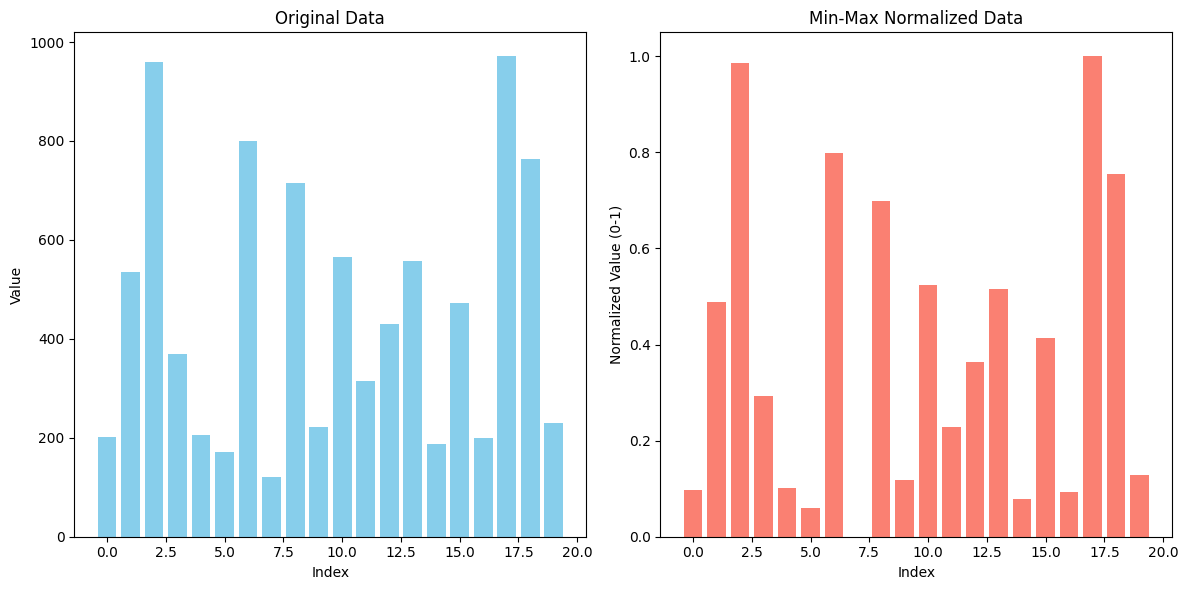

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate some example data
np.random.seed(42)
data = np.random.randint(100, 1000, 20)  # 20 random integer values between 100 and 1000

# Reshape data for the scaler
data = data.reshape(-1, 1)

# Function to apply Min-Max Normalization
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data)

# Plot the original and normalized data
plt.figure(figsize=(12, 6))

# Plot original data with a specific color
plt.subplot(1, 2, 1)
plt.bar(range(len(data)), data.flatten(), color='skyblue')
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot normalized data with a different color
plt.subplot(1, 2, 2)
plt.bar(range(len(normalized_data)), normalized_data.flatten(), color='salmon')
plt.title("Min-Max Normalized Data")
plt.xlabel("Index")
plt.ylabel("Normalized Value (0-1)")

# Show the plots
plt.tight_layout()
plt.show()



## 2. Z-Score Normalization (Standardization)
**Z-Score Normalization** (also known as **Standardization**) is a widely used technique for scaling data. This method transforms the data such that the mean of each feature becomes 0 and the standard deviation becomes 1. It centers the values of a feature around the mean and adjusts the spread of the data based on the standard deviation.

### Formula:
The formula for Z-Score normalization is:

\[
Z = \frac{X - \mu}{\sigma}
\]

Where:
- \( Z \) is the normalized value (the Z-Score).
- \( X \) is the original data point.
- \( \mu \) is the mean of the feature.
- \( \sigma \) is the standard deviation of the feature.

### Steps:
1. **Calculate the mean** of the data for each feature.
2. **Subtract the mean** from each data point to center the data around 0.
3. **Divide by the standard deviation** to scale the data in terms of standard deviations from the mean.

### Example:
Consider the following data: [200, 300, 400, 500, 600].

1. **Calculate the mean**: \( \mu = 400 \).
2. **Calculate the standard deviation**: \( \sigma = 141.42 \).
3. **Apply Z-Score formula**:
   - \( Z = \frac{200 - 400}{141.42} = -1.41 \)
   - \( Z = \frac{300 - 400}{141.42} = -0.71 \)
   - \( Z = \frac{400 - 400}{141.42} = 0 \)
   - \( Z = \frac{500 - 400}{141.42} = 0.71 \)
   - \( Z = \frac{600 - 400}{141.42} = 1.41 \)

The transformed data values are now standardized with a mean of 0 and a standard deviation of 1.

### Advantages:
- **Centers the data**: Each feature will have a mean of 0 and standard deviation of 1, which helps algorithms converge faster.
- **Less sensitive to outliers**: Unlike Min-Max normalization, which is sensitive to outliers, Z-Score normalization is more robust in that regard.

### Limitations:
- **Outliers can still affect results**: Extreme outliers can impact the calculation of the mean and standard deviation, which might skew the normalized data.
- **Doesn’t restrict the range**: Unlike Min-Max normalization, Z-Score normalization does not bound the data to a specific range (e.g., [0, 1]).


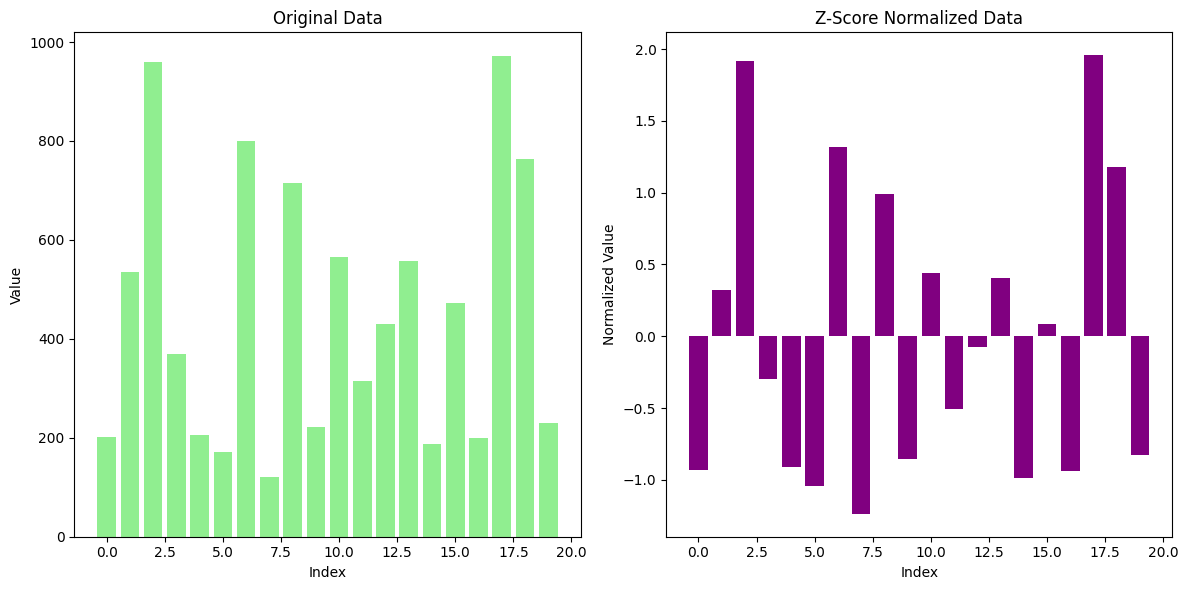

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
data = np.random.randint(100, 1000, 20)  # 20 random integer values between 100 and 1000

# Reshape data for the scaler
data = data.reshape(-1, 1)

# Apply Z-Score Normalization (Standardization)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Plot the original and normalized data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.bar(range(len(data)), data.flatten(), color='lightgreen')
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot normalized data
plt.subplot(1, 2, 2)
plt.bar(range(len(normalized_data)), normalized_data.flatten(), color='purple')
plt.title("Z-Score Normalized Data")
plt.xlabel("Index")
plt.ylabel("Normalized Value")

# Show the plots
plt.tight_layout()
plt.show()

## 3. Decimal Scaling
**Decimal Scaling** is a normalization technique used to scale data by moving the decimal point of the values. The goal is to transform the data so that it falls within a specific range, typically between -1 and 1. Decimal scaling adjusts the values of data based on the maximum absolute value of the dataset.

### Formula:
The transformation is done using the following formula:

\[
X' = \frac{X}{10^j}
\]

Where:
- \( X \) is the original value of the data.
- \( X' \) is the normalized value.
- \( j \) is the smallest integer such that \( |X'| < 1 \), meaning that the maximum absolute value of the data is reduced to a value less than 1.

### Steps:
1. Find the maximum absolute value in the dataset.
2. Determine the number of decimal places \( j \) needed to scale the maximum value to fall between -1 and 1.
3. Divide each data point by \( 10^j \).

### Example:
Suppose we have the following data: [200, 300, 400, 500, 600].

1. The maximum absolute value in the dataset is 600.
2. To scale this value so that it falls between -1 and 1, we need to move the decimal point three places, as \( 600 \div 10^3 = 0.6 \). Hence, \( j = 3 \).
3. Now, divide each value by \( 10^3 \):
   - \( 200 \div 10^3 = 0.2 \)
   - \( 300 \div 10^3 = 0.3 \)
   - \( 400 \div 10^3 = 0.4 \)
   - \( 500 \div 10^3 = 0.5 \)
   - \( 600 \div 10^3 = 0.6 \)

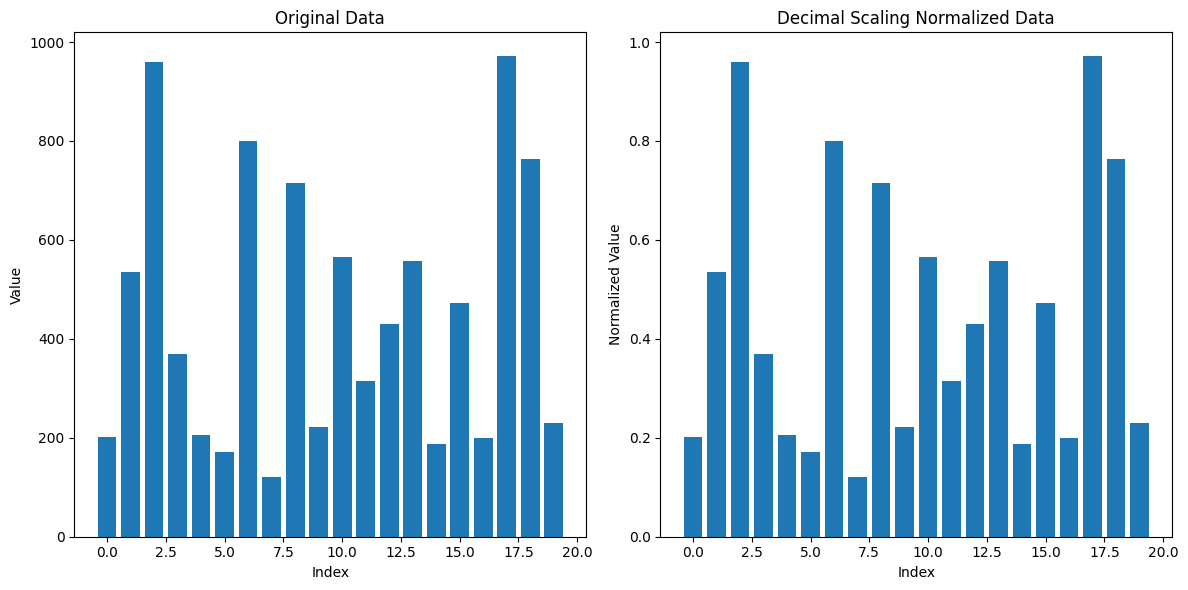

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
data = np.random.randint(100, 1000, 20)  # 20 random integer values between 100 and 1000

# Function to apply Decimal Scaling Normalization
def decimal_scaling(data):
    max_value = np.max(np.abs(data))
    j = np.ceil(np.log10(max_value))
    normalized_data = data / (10**j)
    return normalized_data

# Apply Decimal Scaling normalization
normalized_data = decimal_scaling(data)

# Plot the original and normalized data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.bar(range(len(data)), data)
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot normalized data
plt.subplot(1, 2, 2)
plt.bar(range(len(normalized_data)), normalized_data)
plt.title("Decimal Scaling Normalized Data")
plt.xlabel("Index")
plt.ylabel("Normalized Value")

# Show the plots
plt.tight_layout()
plt.show()


## 4. Max Abs Normalization
**Max Abs Normalization** is a data normalization technique that scales the data by dividing each value by the maximum absolute value in the dataset. This method ensures that the range of the values is between -1 and 1, without distorting the sign of the data points.

Max Abs Normalization is particularly useful when working with datasets that have both positive and negative values, and where the relative scale of the data is important but does not need to be constrained within a fixed range like [0, 1].

### Formula:
The formula for Max Abs Normalization is:

\[
X' = \frac{X}{|X_{\text{max}}|}
\]

Where:
- \( X \) is the original value.
- \( X' \) is the normalized value.
- \( X_{\text{max}} \) is the maximum absolute value in the dataset.

### Steps:
1. **Find the maximum absolute value** in the dataset.
2. **Divide each value** in the dataset by this maximum absolute value.

### Example:
Consider the following dataset: [100, -50, 300, -400, 200].

1. **Find the maximum absolute value**: In this case, \( X_{\text{max}} = 400 \).
2. Normalize the data:
   - \( X' = \frac{100}{400} = 0.25 \)
   - \( X' = \frac{-50}{400} = -0.125 \)
   - \( X' = \frac{300}{400} = 0.75 \)
   - \( X' = \frac{-400}{400} = -1 \)
   - \( X' = \frac{200}{400} = 0.5 \)

### Advantages:
- **Retains the sign** of the data, which can be important in certain applications.
- **Efficient for sparse data**: Since it doesn't shift the data (as with Z-Score), it’s a good choice when dealing with large sparse matrices.

### Limitations:
- It only scales based on the maximum absolute value, so if your dataset contains extreme outliers, this method can compress other values too much, limiting its effectiveness for datasets with large outliers.
- It does not center the data around 0, meaning that the mean of the dataset may not be 0 after normalization.


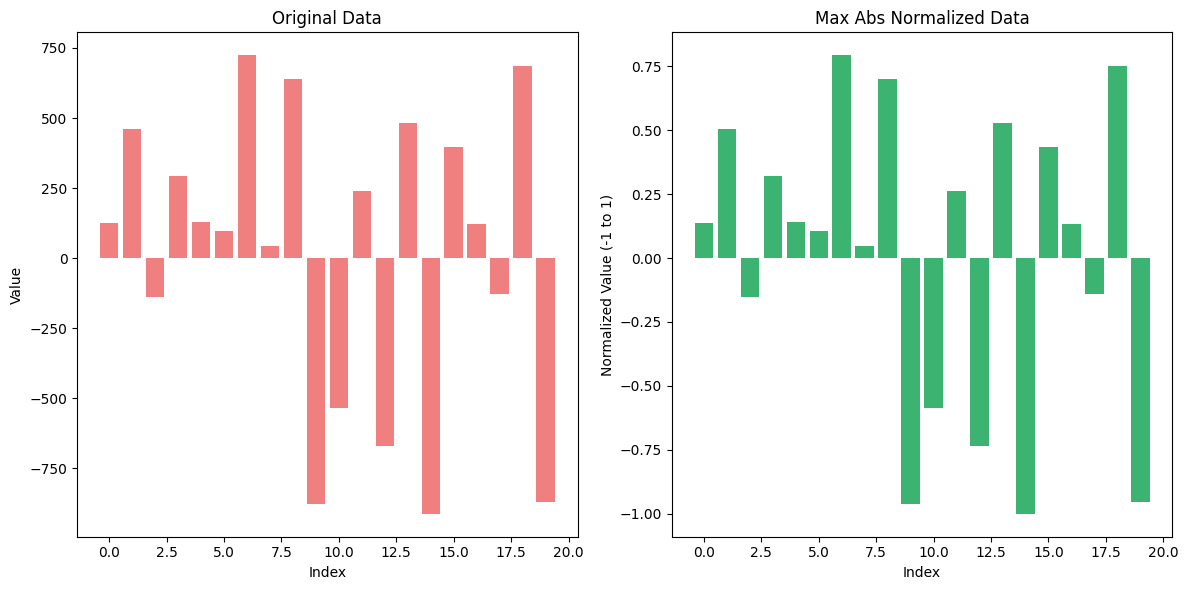

In [5]:
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data with both positive and negative values
np.random.seed(42)
data = np.random.randint(-1000, 1000, 20)  # 20 random integer values between -1000 and 1000

# Reshape data for the scaler
data = data.reshape(-1, 1)

# Apply Max Abs Normalization
max_abs_scaler = MaxAbsScaler()
normalized_data = max_abs_scaler.fit_transform(data)

# Plot the original and normalized data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.bar(range(len(data)), data.flatten(), color='lightcoral')
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot normalized data
plt.subplot(1, 2, 2)
plt.bar(range(len(normalized_data)), normalized_data.flatten(), color='mediumseagreen')
plt.title("Max Abs Normalized Data")
plt.xlabel("Index")
plt.ylabel("Normalized Value (-1 to 1)")

# Show the plots
plt.tight_layout()
plt.show()


## 5. Robust Scaler
**Robust Scaler** is a normalization technique that scales data using statistics that are robust to outliers, particularly the **median** and the **interquartile range (IQR)**. This method is useful when the data contains extreme values or outliers, which can disproportionately influence the results of other scaling techniques such as Min-Max or Z-Score normalization.

### Formula:
Robust Scaler transforms the data using the following formula:

\[
X' = \frac{X - \text{median}}{IQR}
\]

Where:
- \( X \) is the original data value.
- \( X' \) is the scaled value.
- **Median** is the central value of the dataset.
- **IQR (Interquartile Range)** is the range between the 25th percentile (Q1) and the 75th percentile (Q3), i.e., \( IQR = Q3 - Q1 \).

### Steps:
1. **Calculate the median** of the feature.
2. **Calculate the IQR** (the difference between the 75th and 25th percentiles).
3. **Subtract the median** from each data point to center the data.
4. **Divide by the IQR** to scale the data.

### Example:
Consider the following dataset: [10, 15, 14, 12, 200].

1. **Median**: The median of this dataset is 14.
2. **IQR**: The IQR is the difference between the 75th percentile (15) and the 25th percentile (12), so IQR = 15 - 12 = 3.
3. Normalize each value:
   - \( X' = \frac{10 - 14}{3} = -1.33 \)
   - \( X' = \frac{15 - 14}{3} = 0.33 \)
   - \( X' = \frac{14 - 14}{3} = 0 \)
   - \( X' = \frac{12 - 14}{3} = -0.67 \)
   - \( X' = \frac{200 - 14}{3} = 62 \)

Notice how the outlier (200) doesn’t skew the scaling as it would with Min-Max normalization or Z-Score normalization, and the rest of the values are scaled relative to the IQR.

### Advantages:
- **Resistant to outliers**: Unlike Min-Max and Z-Score normalization, Robust Scaler focuses on the middle 50% of the data, making it less sensitive to outliers.
- **Centers the data**: Similar to Z-Score normalization, it centers the data by subtracting the median but scales by the IQR instead of the standard deviation.

### Limitations:
- **Does not bound values**: Unlike Min-Max scaling, it doesn't ensure the data is bounded within a specific range (such as [0, 1]).
- **Not effective for small datasets**: If the dataset is small or doesn't have a large enough spread of values, Robust Scaler may not be as effective.

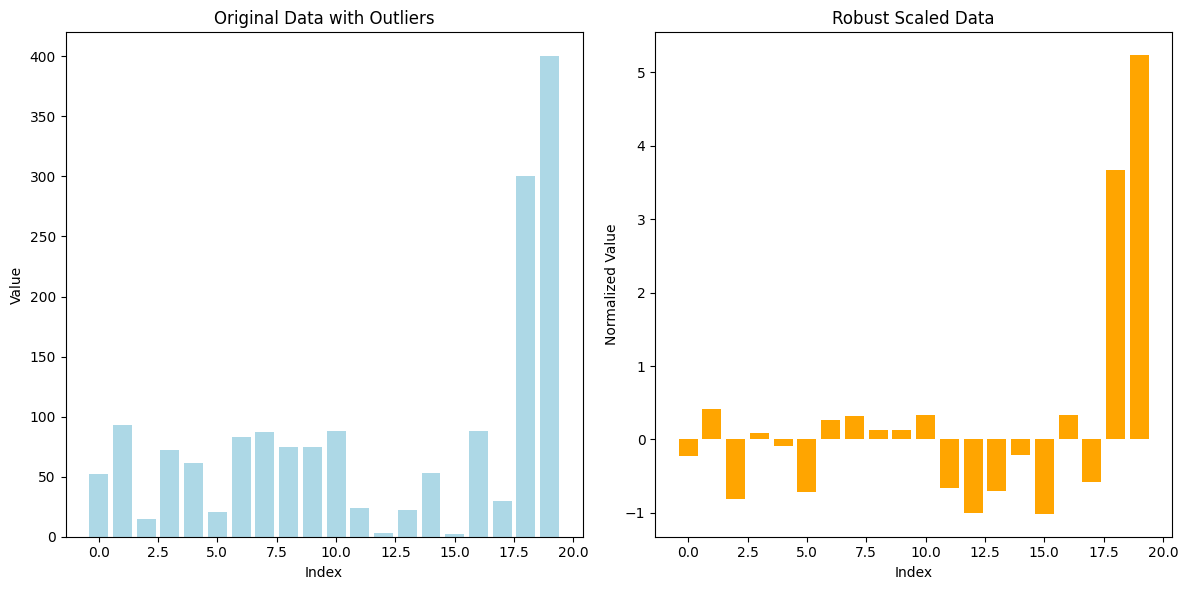

In [6]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data with outliers
np.random.seed(42)
data = np.random.randint(1, 100, 18)  # 18 random integer values between 1 and 100
data_with_outliers = np.append(data, [300, 400])  # Adding outliers to the data

# Reshape data for the scaler
data_with_outliers = data_with_outliers.reshape(-1, 1)

# Apply Robust Scaler Normalization
robust_scaler = RobustScaler()
normalized_data = robust_scaler.fit_transform(data_with_outliers)

# Plot the original and normalized data
plt.figure(figsize=(12, 6))

# Plot original data with outliers
plt.subplot(1, 2, 1)
plt.bar(range(len(data_with_outliers)), data_with_outliers.flatten(), color='lightblue')
plt.title("Original Data with Outliers")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot normalized data
plt.subplot(1, 2, 2)
plt.bar(range(len(normalized_data)), normalized_data.flatten(), color='orange')
plt.title("Robust Scaled Data")
plt.xlabel("Index")
plt.ylabel("Normalized Value")

# Show the plots
plt.tight_layout()
plt.show()


## 6. Log Transformation
**Log Transformation** is a data normalization technique that applies the logarithmic function to the data. It is often used when the data spans multiple orders of magnitude or when there is a significant skew in the data distribution. By applying a log transformation, the wide range of values is compressed, making the data more manageable and potentially more suitable for machine learning algorithms.

### Formula:
The formula for log transformation is:

\[
X' = \log(X + 1)
\]

Where:
- \( X \) is the original data point.
- \( X' \) is the transformed value.
- The \( +1 \) is used to avoid taking the log of zero, as the logarithm of zero is undefined.

### Purpose:
- **Compress large values**: Log transformation reduces the effect of very large values by compressing the data, making large differences smaller.
- **Reduce skewness**: It helps in transforming skewed data into a more normal distribution, which is beneficial for many machine learning algorithms that assume normally distributed input.
  
### Example:
Consider the dataset: [1, 10, 100, 1000, 10000].

1. Apply the log transformation:
   - \( \log(1 + 1) = \log(2) \approx 0.30 \)
   - \( \log(10 + 1) = \log(11) \approx 2.40 \)
   - \( \log(100 + 1) = \log(101) \approx 4.61 \)
   - \( \log(1000 + 1) = \log(1001) \approx 6.91 \)
   - \( \log(10000 + 1) = \log(10001) \approx 9.21 \)

Now the values have been compressed, and the extreme differences between the original values are reduced.

### Advantages:
- **Reduces the impact of large values**: It compresses the range of data, particularly when dealing with large or small numbers.
- **Helps to stabilize variance**: By transforming the data, log transformation can reduce the variance in data, making it more homogeneous.

### Limitations:
- **Only applicable to positive values**: Log transformation can only be applied to positive values, as the logarithm of zero or negative values is undefined. A shift like adding 1 is usually applied to handle zero values.
- **Loss of interpretability**: After applying the transformation, the transformed values may lose their original interpretability, especially if the relationship between features is non-linear.

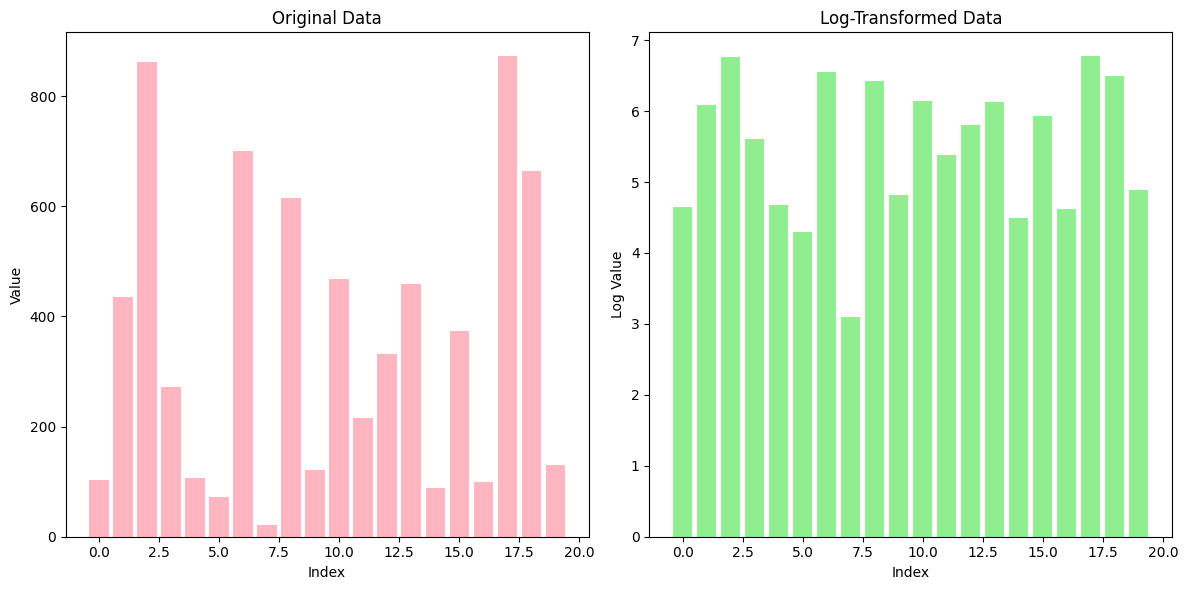

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data, including large values
np.random.seed(42)
data = np.random.randint(1, 1000, 20)  # 20 random integer values between 1 and 1000

# Apply Log Transformation (log(x + 1) to avoid log(0))
log_transformed_data = np.log1p(data)  # log1p is equivalent to log(x + 1)

# Plot the original and log-transformed data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.bar(range(len(data)), data, color='lightpink')
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

# Plot log-transformed data
plt.subplot(1, 2, 2)
plt.bar(range(len(log_transformed_data)), log_transformed_data, color='lightgreen')
plt.title("Log-Transformed Data")
plt.xlabel("Index")
plt.ylabel("Log Value")

# Show the plots
plt.tight_layout()
plt.show()



## 7. Power Transformation
**Power Transformation** is a family of normalization techniques that aim to stabilize variance, make the data more Gaussian-like (normally distributed), and reduce the impact of skewness in the dataset. This technique is especially useful when the data does not fit well with linear models due to non-normal distributions or heteroscedasticity (unequal spread of residuals). Two common types of power transformations are the **Box-Cox** and **Yeo-Johnson** transformations.

### 1. **Box-Cox Transformation**:
- The **Box-Cox** transformation is suitable for data that is strictly positive (greater than 0).
- It applies the following transformation depending on a parameter \( \lambda \):

\[
X' = 
\begin{cases} 
\frac{X^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\log(X), & \text{if } \lambda = 0 
\end{cases}
\]

Where:
- \( X \) is the original data point.
- \( X' \) is the transformed data.
- \( \lambda \) is a parameter that determines the shape of the transformation.

The **Box-Cox** transformation seeks to find the optimal value of \( \lambda \) that makes the data as close to normal as possible.

### 2. **Yeo-Johnson Transformation**:
- The **Yeo-Johnson** transformation is an extension of Box-Cox that can handle both **positive and negative values**.
- It applies different transformations based on whether the data is positive or negative:

\[
X' = 
\begin{cases} 
\frac{(X + 1)^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \text{ and } X \geq 0 \\
\frac{-(|X| + 1)^{2 - \lambda} - 1}{2 - \lambda}, & \text{if } \lambda \neq 2 \text{ and } X < 0 
\end{cases}
\]

Where \( \lambda \) is chosen to make the distribution more normal.

### Purpose:
- **Stabilizing variance**: Power transformations reduce variance when the spread of the data increases with its mean.
- **Making data more Gaussian**: Many machine learning algorithms, especially linear models, perform better when data is normally distributed.
- **Handling skewed data**: It is particularly useful for skewed data, helping reduce the effect of outliers or extreme values.

### Example:
Consider the dataset: [1, 2, 3, 4, 5, 6, 1000].

- Applying the **Box-Cox** transformation with an appropriate \( \lambda \) compresses the high value (1000) and stretches the smaller values (1, 2, 3), making the distribution more symmetric.
- If the dataset contains negative values, you would use the **Yeo-Johnson** transformation instead, which can handle negative values while achieving a similar effect.

### Advantages:
- **Flexible**: It can be adapted to a wide range of data types, including positive and negative values (Yeo-Johnson) or strictly positive values (Box-Cox).
- **Improves normality**: By transforming skewed data into a more normal distribution, it helps improve the performance of many machine learning models that assume normally distributed input.

### Limitations:
- **Sensitive to parameter tuning**: The optimal \( \lambda \) must be carefully selected to achieve the best results.
- **Complexity**: It can add complexity to the data preprocessing pipeline, as different transformations may be needed for different features.
- **Non-reversible**: After applying a power transformation, the original data may lose its interpretability, especially if the relationship between features is non-linear.


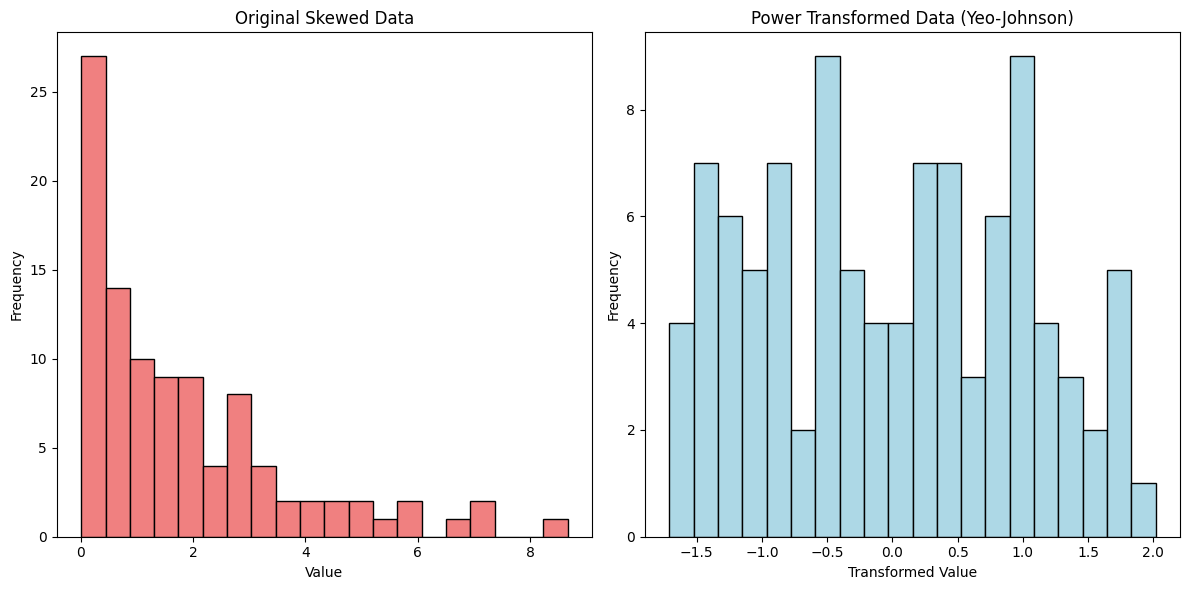

In [8]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data with skewness
np.random.seed(42)
data = np.random.exponential(scale=2, size=100)  # 100 values from an exponential distribution (skewed data)

# Reshape data for the transformer
data = data.reshape(-1, 1)

# Apply Power Transformation using Yeo-Johnson (works with both positive and negative data)
power_transformer = PowerTransformer(method='yeo-johnson')
normalized_data = power_transformer.fit_transform(data)

# Plot the original and power-transformed data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, color='lightcoral', edgecolor='black')
plt.title("Original Skewed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Plot power-transformed data
plt.subplot(1, 2, 2)
plt.hist(normalized_data, bins=20, color='lightblue', edgecolor='black')
plt.title("Power Transformed Data (Yeo-Johnson)")
plt.xlabel("Transformed Value")
plt.ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()


## 8. L1 Normalization
**L1 Normalization** is a technique used to normalize the features of a dataset by ensuring that the sum of the absolute values of the feature vector equals 1. This is done by dividing each feature by the sum of the absolute values of all features. 

The formula for L1 normalization for a feature vector \( X = [x_1, x_2, \dots, x_n] \) is:

\[
x_i^{'} = \frac{x_i}{\sum_{i=1}^{n} |x_i|}
\]

Where \( x_i^{'} \) is the normalized value of feature \( x_i \), and \( n \) is the number of features in the vector.

### Key Characteristics:
- **Preserves Sparsity**: L1 normalization is particularly useful when working with sparse datasets, such as in **natural language processing (NLP)**, because it keeps the sparsity of the vector intact. Sparsity means that most values are zero, which is common in text data or recommendation systems.
- **Feature Scaling**: It scales the features such that the sum of their absolute values is 1, ensuring that no single feature disproportionately affects the outcome.
- **Used in Distance Metrics**: L1 normalization is commonly used in algorithms like **K-Nearest Neighbors (KNN)**, where Manhattan distance (L1 distance) is the metric for measuring similarity.

### Example:
For a feature vector \( [3, -2, 5] \), the L1 normalization would be calculated as:

1. Sum of absolute values: \( |3| + |-2| + |5| = 3 + 2 + 5 = 10 \)
2. Normalize each feature:
   - \( \frac{3}{10} = 0.3 \)
   - \( \frac{-2}{10} = -0.2 \)
   - \( \frac{5}{10} = 0.5 \)

Thus, the L1-normalized vector would be \( [0.3, -0.2, 0.5] \).

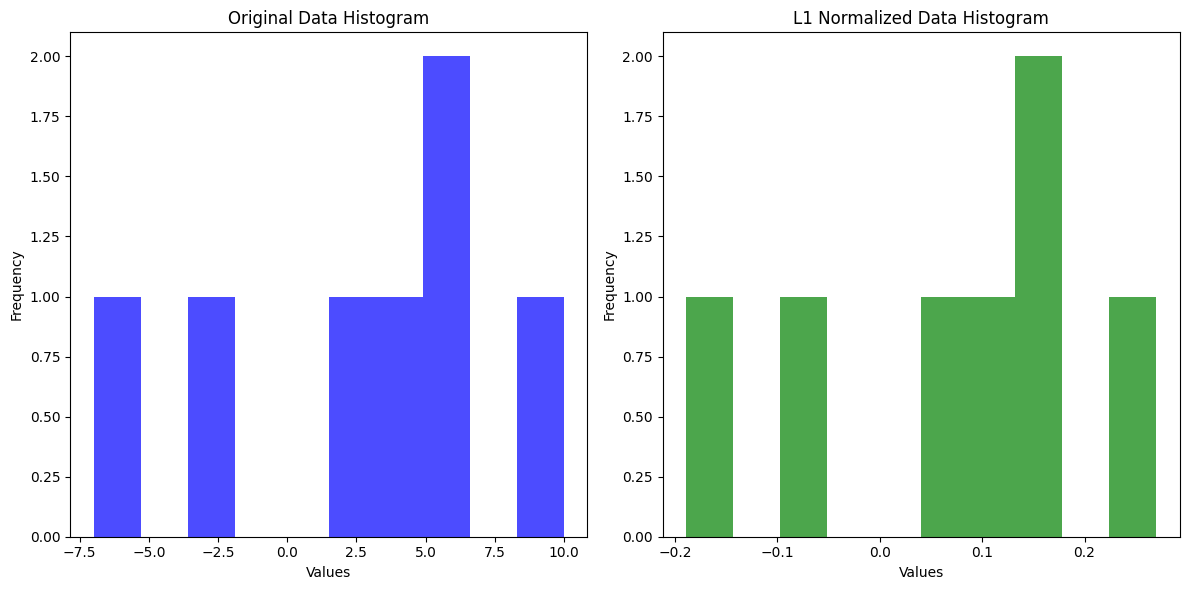

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# More data for L1 normalization
data = np.array([3, -2, 5, 10, -7, 4, 6])

# L1 Normalization
l1_normalized_data = data / np.sum(np.abs(data))

# Plotting histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original Data Histogram
ax1.hist(data, bins=10, color='blue', alpha=0.7)
ax1.set_title("Original Data Histogram")
ax1.set_xlabel("Values")
ax1.set_ylabel("Frequency")

# L1 Normalized Data Histogram
ax2.hist(l1_normalized_data, bins=10, color='green', alpha=0.7)
ax2.set_title("L1 Normalized Data Histogram")
ax2.set_xlabel("Values")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## 9. L2 Normalization
**L2 Normalization** (also known as **vector normalization**) is a normalization technique that transforms data points into unit vectors, ensuring that the **Euclidean norm** (also called the L2 norm) of each data point is equal to 1. This technique is typically used when you want to ensure that all features contribute equally to the model by scaling them based on the length of the data vector.

L2 Normalization is particularly useful for machine learning models that rely on distance metrics (e.g., K-Nearest Neighbors, Support Vector Machines, and Linear Regression) or in models where it’s important to have the same magnitude for all feature vectors.

### Formula:
The L2 norm of a vector is defined as the square root of the sum of the squared values. The formula for L2 normalization is:

\[
X' = \frac{X}{\|X\|_2}
\]

Where:
- \( X \) is the original vector (data point).
- \( X' \) is the L2-normalized vector.
- \( \|X\|_2 \) is the L2 norm, calculated as:

\[
\|X\|_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}
\]

### Steps:
1. **Compute the L2 norm**: Calculate the Euclidean norm (L2 norm) for each data point (vector).
2. **Divide each value**: Divide each component of the data point by the L2 norm to scale the vector.

### Example:
Consider a 2D data point: \( X = [3, 4] \).

1. **Calculate the L2 norm**:
   \[
   \|X\|_2 = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5
   \]
   
2. **Normalize the vector**:
   \[
   X' = \frac{[3, 4]}{5} = [0.6, 0.8]
   \]

Now, the length (L2 norm) of the new vector \( X' \) is equal to 1.

### Advantages:
- **Equal contribution**: It ensures that all features contribute equally to the model by normalizing them based on their magnitude.
- **Prevents domination**: Features with larger magnitudes won’t dominate the results, which is especially useful when features have vastly different scales.

### Limitations:
- **Sensitive to outliers**: L2 normalization is sensitive to outliers. If a feature has extreme values, the L2 norm will be large, and smaller feature values may be reduced to very small numbers, which can negatively affect the model’s performance.
- **Non-sparse results**: L2 normalization does not encourage sparsity in the data. If you need a sparse representation (i.e., more zeros in the dataset), L1 normalization may be a better choice.

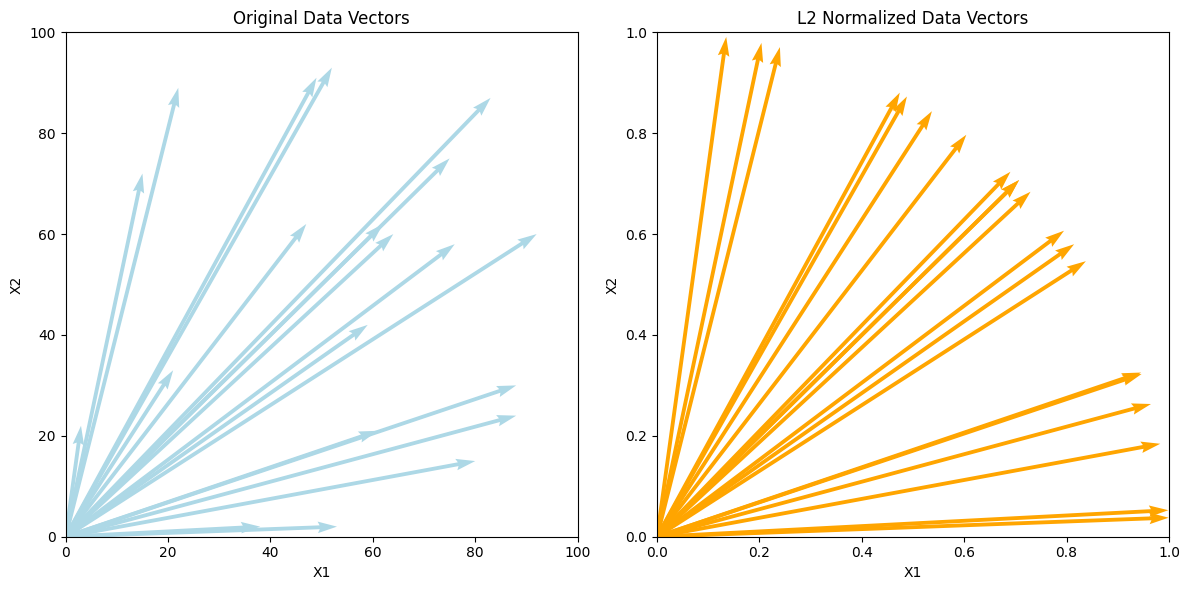

In [9]:
# Adjusting the plot to avoid the error with quiver plotting
# The idea is to plot vectors from the origin and normalize them
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
# Generate some example data
np.random.seed(42)
data = np.random.randint(1, 100, (20, 2))  # 20 random 2D data points (for simplicity)

# Apply L2 Normalization
l2_normalizer = Normalizer(norm='l2')
normalized_data = l2_normalizer.fit_transform(data)

# Plot the original and L2-normalized data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.quiver(np.zeros(len(data)), np.zeros(len(data)), data[:, 0], data[:, 1], angles='xy', scale_units='xy', scale=1, color='lightblue')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title("Original Data Vectors")
plt.xlabel("X1")
plt.ylabel("X2")

# Plot L2-normalized data
plt.subplot(1, 2, 2)
plt.quiver(np.zeros(len(normalized_data)), np.zeros(len(normalized_data)), normalized_data[:, 0], normalized_data[:, 1], angles='xy', scale_units='xy', scale=1, color='orange')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("L2 Normalized Data Vectors")
plt.xlabel("X1")
plt.ylabel("X2")

# Show the plots
plt.tight_layout()
plt.show()


## 10. My Experience at Pishgam Iranian Company
**My Experience at Pishgam Iranian Company in External Quality Assessment of Laboratories**

At Pishgam Iranian Company, we use a detailed methodology for the external quality assessment of laboratories, involving comprehensive analysis of laboratory data and quality control procedures. This process generally includes the following steps:

1. **Sorting and Determining the Median (X\*)**:
   In the first step, we sort the laboratory data from smallest to largest and determine the median (X\*). Then, we calculate the absolute deviation of each result from the median.

2. **Calculating the Median of Absolute Deviations and S\***:
   The median of the absolute deviations is computed, and to obtain the parameter S\*, we multiply the value by 1.483. To determine δ, this value is multiplied by 1.5.

3. **Defining the Chart Range**:
   The range of the chart is determined by adding and subtracting δ to/from the median. If a data point falls outside the defined minimum or maximum range, it is replaced with the min or max value. In this way, the values of laboratories outside the range are "transformed," but in the "SDI" score section, instead of displaying a numerical value, the phrase "Out Of Range" is shown.

4. **Calculating the New Mean and Standard Deviation**:
   With the new data (including transformed and untransformed values), the mean and standard deviation (SD) are calculated. The obtained standard deviation is then multiplied by 1.134 to determine SD\*. Additionally, the mean coefficient of variation (CV̅) is calculated based on SD\*.

5. **Repeating the Process Until Achieving the Desired Range**:
   This process is repeated with the new transformed values until all readings fall within the defined min and max range. It is important to note that, in the "Your Result" section of the results form, the actual value of each laboratory is displayed, even if it was transformed in the calculation.

6. **Calculating SDI and Related Metrics**:
   The SDI is calculated using the following formula:
   \[
   SDI = \frac{(Laboratory Result - Target)}{SD \: Acceptable}
   \]
   The value of SD Acceptable is calculated based on the permissible CV̅ using the following formula:
   \[
   SD \: Acceptable = \frac{ccv \times Target}{100}
   \]

7. **Calculating RMSDI and %Dev**:
   For each parameter (such as the glucose test), the mean of SDIs from recent rounds (from 2 to 10 rounds) is used to calculate the Relative Mean SDI (RMSDI). The percentage deviation (%Dev) is also calculated as follows:
   \[
   \%Dev = \frac{(Laboratory Result - Target)}{Target} \times 100
   \]
   The average of deviations for each parameter (RM%Dev) is also calculated and reported.

8. **Calculating Uncertainty (Um)**:
   To calculate the uncertainty (Um), we use the following formula, which is detailed in the ISO 13528 standard:
   \[
   Um = \frac{1.25 \times SD^*}{\sqrt{n}}
   \]


![ISO 13528 Approch](pishgam.png)


### Sum up
Choosing the right normalization method depends on the characteristics of the data and the algorithm being used. Proper normalization can lead to significant improvements in model performance by ensuring that features contribute equally to the model.

# Refrences

1. **Scikit-learn Documentation**:  
   The official documentation of Scikit-learn, a popular Python library, is a key source for the implementation of normalization methods such as Z-Score Normalization, Min-Max Normalization, Power Transformation, Robust Scaler, and L2 Normalization.
   - Documentation link: https://scikit-learn.org/stable/modules/preprocessing.html
2. **16 Data Normalization Methods**
   - Documentation link: https://medium.com/@reinapeh/16-data-normalization-methods-using-python-with-examples-part-5-of-6-8744cb2b2e15
3. **ISO 13528**
   - Chapter 9 Calculation of performance statistics



